<a href="https://colab.research.google.com/github/sagimum/Task-Wise-Prediction-of-AD-Using-ML-Methods/blob/main/copy_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import RFE, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
data = pd.read_excel("copy task.xlsx")
label = data["class"]
# Specify the columns to remove
columns_to_remove = ['ID', 'class']

# Remove the specified columns from the DataFrame
features = data.drop(columns=columns_to_remove, axis=1)

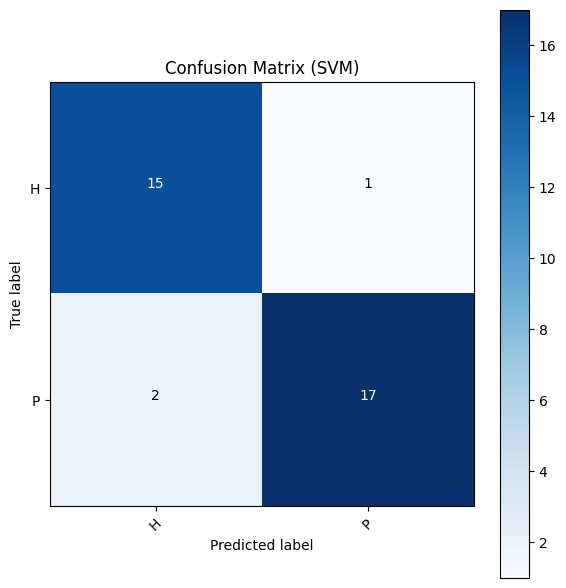

Accuracy: 0.9142857142857143
Precision: 0.9444444444444444
Recall: 0.8947368421052632
F1-score: 0.918918918918919
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.94      0.89      0.92        19

    accuracy                           0.91        35
   macro avg       0.91      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [32]:

# Set seeds for reproducibility
def set_seeds(seed=5):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

X = features
y = label

# Assuming your data is already loaded into 'features' and 'labels' variables
from sklearn.preprocessing import LabelEncoder

# Assuming y is your label column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Preprocessing: Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM classifier
svm = SVC()

# # Define the parameter grid to search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['auto']
# }

# # Perform grid search with cross-validation to find the best parameters
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

# # Train a new SVM classifier with the best parameters on the entire training data
# best_svm = SVC(**best_params)
svm.fit(X_train, y_train)

# Assuming you have a trained model and test data
y_pred = svm.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# # Calculate Sensitivity and Specificity
# tn, fp, fn, tp = cm.ravel()
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# Print Performance Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


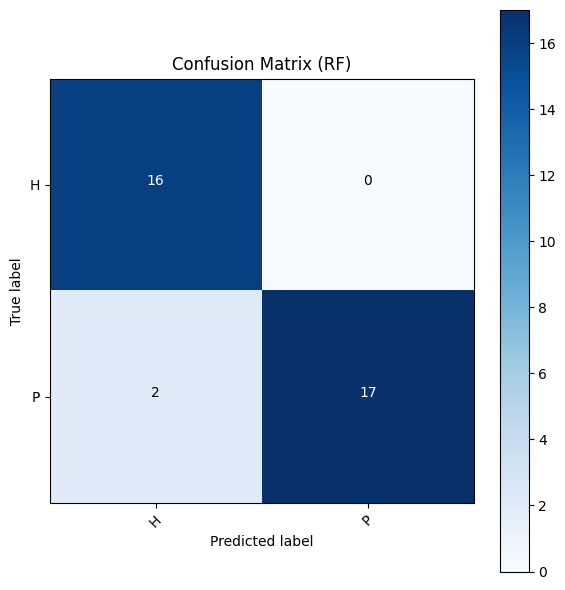

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.89      0.94        19

    accuracy                           0.94        35
   macro avg       0.94      0.95      0.94        35
weighted avg       0.95      0.94      0.94        35

Accuracy: 0.9428571428571428
Precision: 1.0
Recall: 0.8947368421052632
F1-score: 0.9444444444444444


In [50]:
from sklearn.ensemble import RandomForestClassifier

def set_seeds(seed=6):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()
X = features
y = label

# Assuming your data is already loaded into 'features' and 'labels' variables
from sklearn.preprocessing import LabelEncoder

# Assuming y is your label column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Preprocessing: Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2)
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the Random Forest classifier
rf = RandomForestClassifier()

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform grid search with cross-validation to find the best parameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters:", best_params)
# print("Best cross-validation score:", best_score)

# # Train a new Random Forest classifier with the best parameters on the entire training data
# best_rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

# Assuming you have a trained model and test data
y_pred = rf.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (RF)')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# # Calculate Sensitivity and Specificity
# tn, fp, fn, tp = cm.ravel()
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# Print Performance Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.7775132275132275


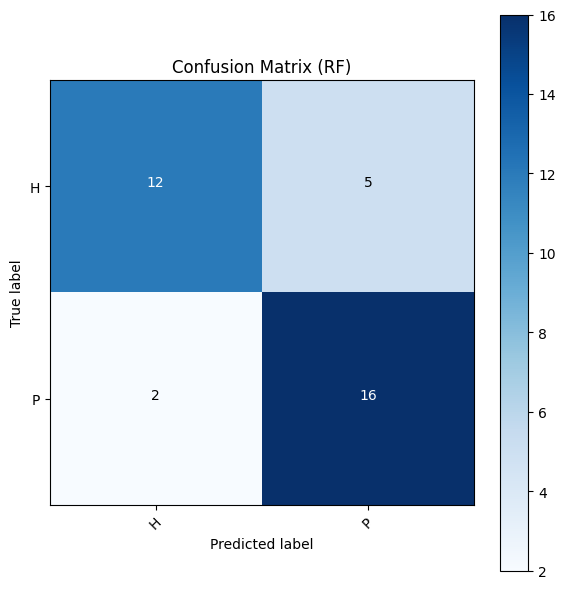

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.76      0.89      0.82        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35

Accuracy: 0.8
Precision: 0.7619047619047619
Recall: 0.8888888888888888
F1-score: 0.8205128205128205


In [68]:
from sklearn.tree import DecisionTreeClassifier

def set_seeds(seed=4):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()
# Load the dataset (replace this with your actual data loading code)
X = features
y = label

# Assuming y is your label column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Preprocessing: Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2)
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Train a new Decision Tree classifier with the best parameters on the entire training data
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

# Assuming you have a trained model and test data
y_pred = best_dt.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (RF)')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# # Calculate Sensitivity and Specificity
# tn, fp, fn, tp = cm.ravel()
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# Print Performance Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


**GNB**

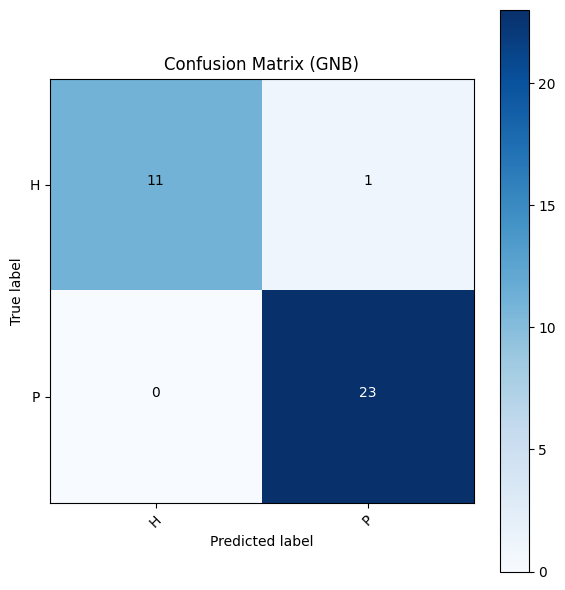

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.96      1.00      0.98        23

    accuracy                           0.97        35
   macro avg       0.98      0.96      0.97        35
weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714
Precision: 0.9583333333333334
Recall: 1.0
F1-score: 0.9787234042553191


In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def set_seeds(seed=9):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()
# Load the dataset (replace this with your actual data loading code)
X = features
y = label

# Assuming y is your label column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# # Preprocessing: Scale features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # Splitting data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

# Define the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the Gaussian Naive Bayes classifier on the entire training data
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_binary = gnb.predict(X_test)
# y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (GNB)')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# # Calculate Sensitivity and Specificity
# tn, fp, fn, tp = cm.ravel()
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# Print Performance Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def set_seeds(seed=0):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for 1D CNN input (assuming data has only one feature)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
5/5 [==============================] - 5s 154ms/step - loss: 0.6495 - accuracy: 0.6475 - val_loss: 0.5466 - val_accuracy: 0.8000
Epoch 2/10
5/5 [==============================] - 0s 46ms/step - loss: 0.4460 - accuracy: 0.8201 - val_loss: 0.4744 - val_accuracy: 0.8286
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 0.2953 - accuracy: 0.8705 - val_loss: 0.5410 - val_accuracy: 0.8857
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 0.2820 - accuracy: 0.8561 - val_loss: 0.5423 - val_accuracy: 0.8286
Epoch 5/10
5/5 [==============================] - 0s 40ms/step - loss: 0.1300 - accuracy: 0.9640 - val_loss: 0.5557 - val_accuracy: 0.8286
Epoch 6/10
5/5 [==============================] - 0s 45ms/step - loss: 0.0845 - accuracy: 0.9784 - val_loss: 0.5519 - val_accuracy: 0.8286
Epoch 7/10
5/5 [==============================] - 0s 45ms/step - loss: 0.0565 - accuracy: 0.9856 - val_loss: 0.5523 - val_accuracy: 0.8286
Epoch 8/10
5/5 [==========

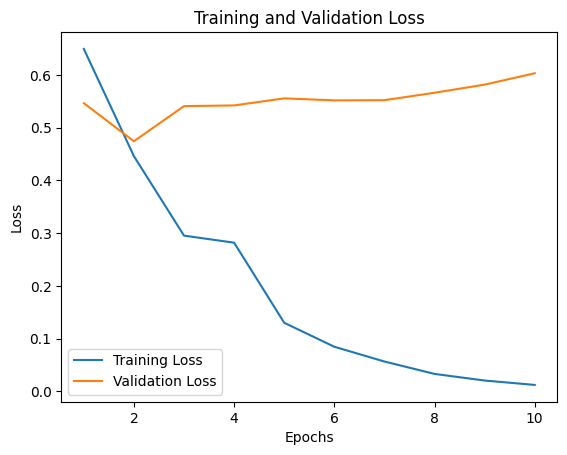

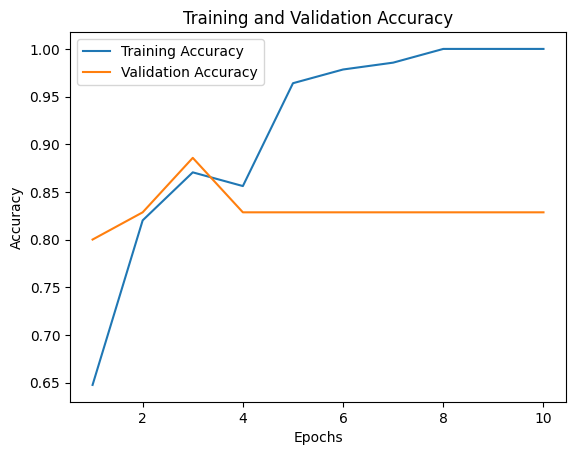

In [88]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**LDA**

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(1)
X = features
y = label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()
# Define the parameters grid for LDA
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # LDA solvers
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]  # Shrinkage parameter
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the LDA classifier with the best parameters on the entire training data
best_lda = LinearDiscriminantAnalysis(**best_params)
best_lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_lda.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Best parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7714285714285715
Best parameters: {'shrinkage': 'auto', 'solver': 'eigen'}
Precision: 0.793233082706767
Recall: 0.7714285714285715
F1 Score: 0.7721755368814193


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-package

**KNN**

In [108]:
from sklearn.neighbors import KNeighborsClassifier

def set_seeds(seed=0):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2)

# Define the KNN classifier
knn = KNeighborsClassifier()

# # Define the parameter grid to search
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
# }

# # Perform grid search with cross-validation to find the best parameters
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters:", best_params)
# print("Best cross-validation score:", best_score)

# # Train a new KNN classifier with the best parameters on the entire training data
# best_knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6
Precision: 0.775
Recall: 0.6
F1 Score: 0.516
